## fMRI-01: In-Class Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### [1] Import, manipulate, and visualize the HRF

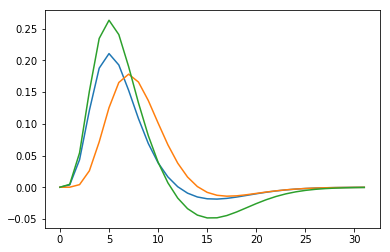

In [2]:
from spm_hrf import spm_hrf

plt.plot(spm_hrf(1, 6))
plt.plot(spm_hrf(1, t1=8))
plt.plot(spm_hrf(1, ratio=3));

### [2] Generate boxcar regressors

**Step 1:** Define times

In [3]:
times = np.arange(0, 192, 0.1)

**Step 2:** Generate boxcars

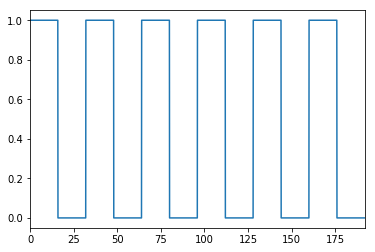

In [4]:
boxcars = np.zeros_like(times)
events = [(0,16),(32,48),(64,80),(96,112),(128,144),(160,176)]

for onset, offset in events:
    boxcars[np.logical_and(times >= onset, times < offset)] = 1
    
plt.plot(times, boxcars);
plt.xlim(0,192);

**Step 3:** Convolution

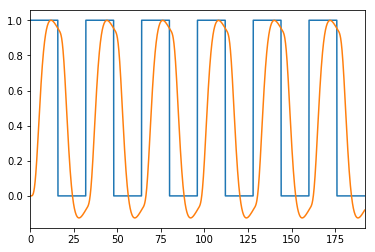

In [5]:
hrf = spm_hrf(0.1)
bold = np.convolve(boxcars, hrf)[:times.size]
bold /= bold.max() # normalize

plt.plot(times, boxcars);
plt.plot(times, bold);
plt.xlim(0,192);

**Step 4:** Downsample

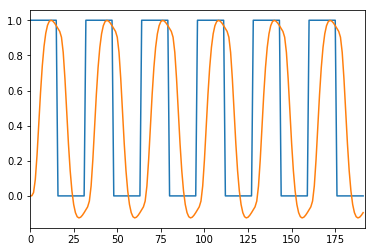

In [6]:
boxcars = boxcars[np.in1d(times, np.arange(192))]
bold = bold[np.in1d(times, np.arange(192))]
times = times[np.in1d(times, np.arange(192))]

plt.plot(times, boxcars);
plt.plot(times, bold);
plt.xlim(0,192);

### [3] Simple Regression

Simulate Data

In [7]:
## Set seed.
np.random.seed(0)

## Define data features.
b0 = 100
b1 = 2.5
epsilon = 1

## Simulate data.
y = b0 + b1 * bold + np.random.normal(size=bold.size)

## Save.
np.savez_compressed('data-01.npz', times=times, y=y)

**Step 1:** Load and visualize data

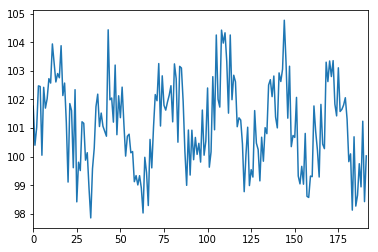

In [8]:
## Load and extract data.
npz = np.load('data-01.npz')
times = npz['times']
y = npz['y']

## Plot data.
plt.plot(times, y)
plt.xlim(0,192);

**Step 2:** Constract design matrix

In [9]:
X = np.column_stack([np.ones_like(bold), bold])

**Step 3:** Regression

mu = 2.496


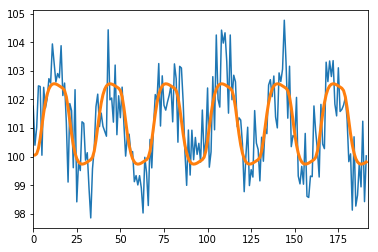

In [10]:
## Perform regression.
b, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
print('mu = %0.3f' %b[-1])

## Posterior predictive check.
yhat = X @ b

## Plot.
plt.plot(times, y)
plt.plot(times, yhat, lw=3)
plt.xlim(0,192);